In [1]:
import zipfile

In [2]:
with zipfile.ZipFile('../data/raw/ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/raw/')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/raw/ml-100k/u.data', sep='\t', header=None)

In [4]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
# Let's add column names
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
# Let's analyze occupation and zipcodes
df_user = pd.read_csv('../data/raw/ml-100k/u.user', sep='|', header=None)
df_user.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
df_user.columns = ['user_id','age','gender','occupation', 'zipcode']
df_user.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [10]:
# Let's check the distrubiton of occupation
df_user['occupation'].value_counts()

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64

<Axes: xlabel='age'>

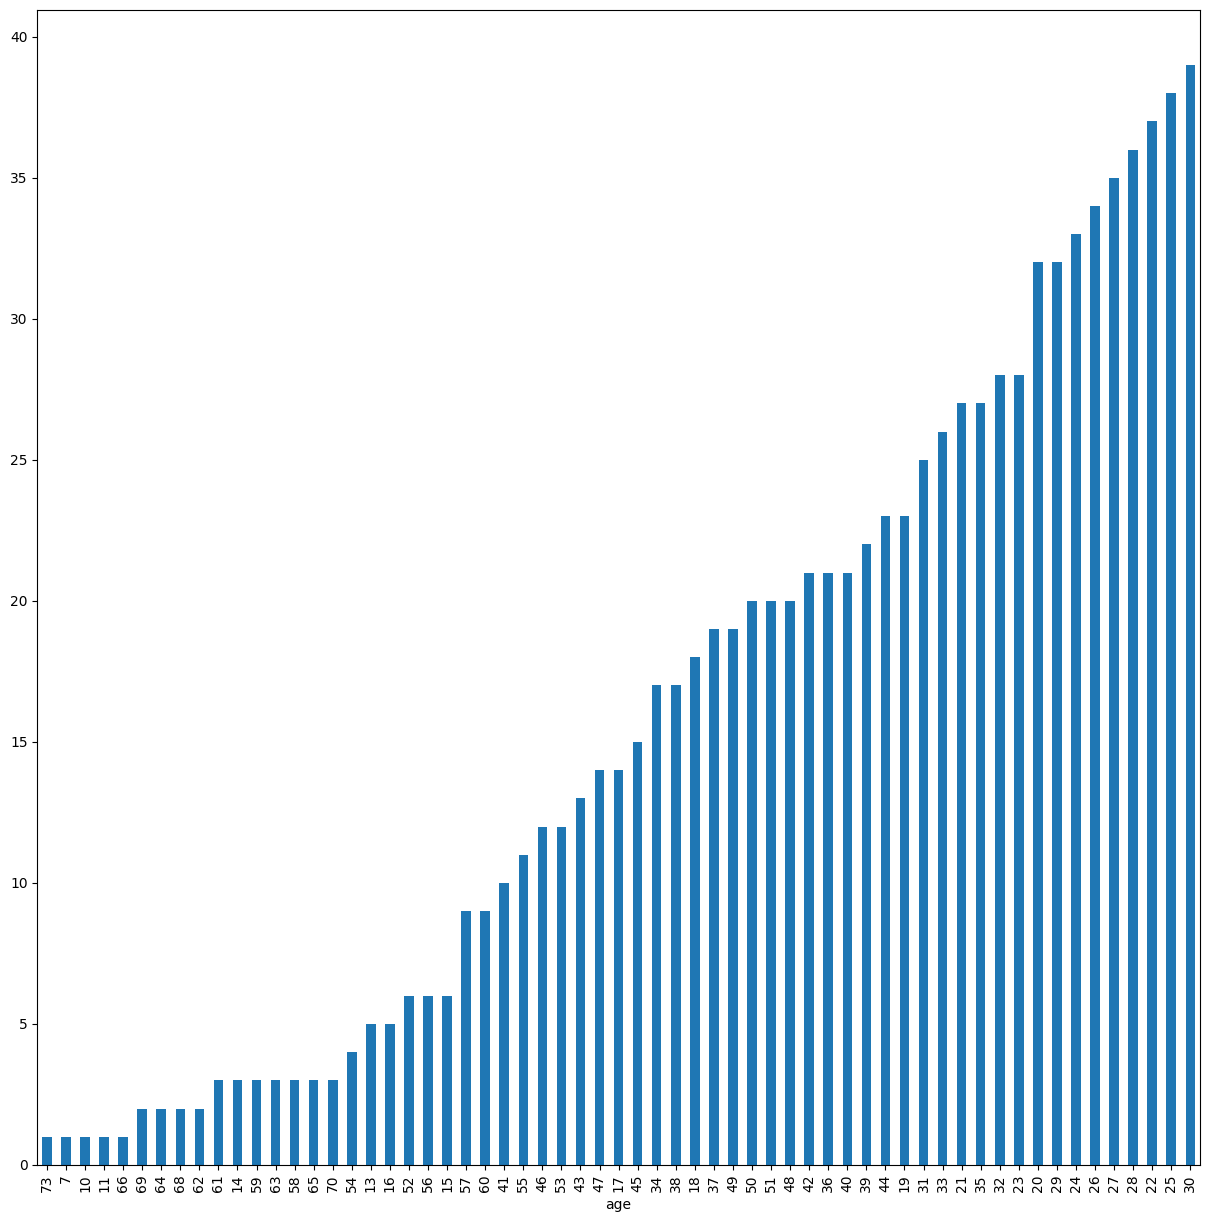

In [31]:
# Let's plot the distribution of age
df_user['age'].value_counts().sort_values().plot(kind='bar', figsize=(15,15))

In [34]:
# Let's see what data we have about each film
df_item = pd.read_csv('../data/raw/ml-100k/u.item', sep='|', header=None, encoding='latin-1')
df_item.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

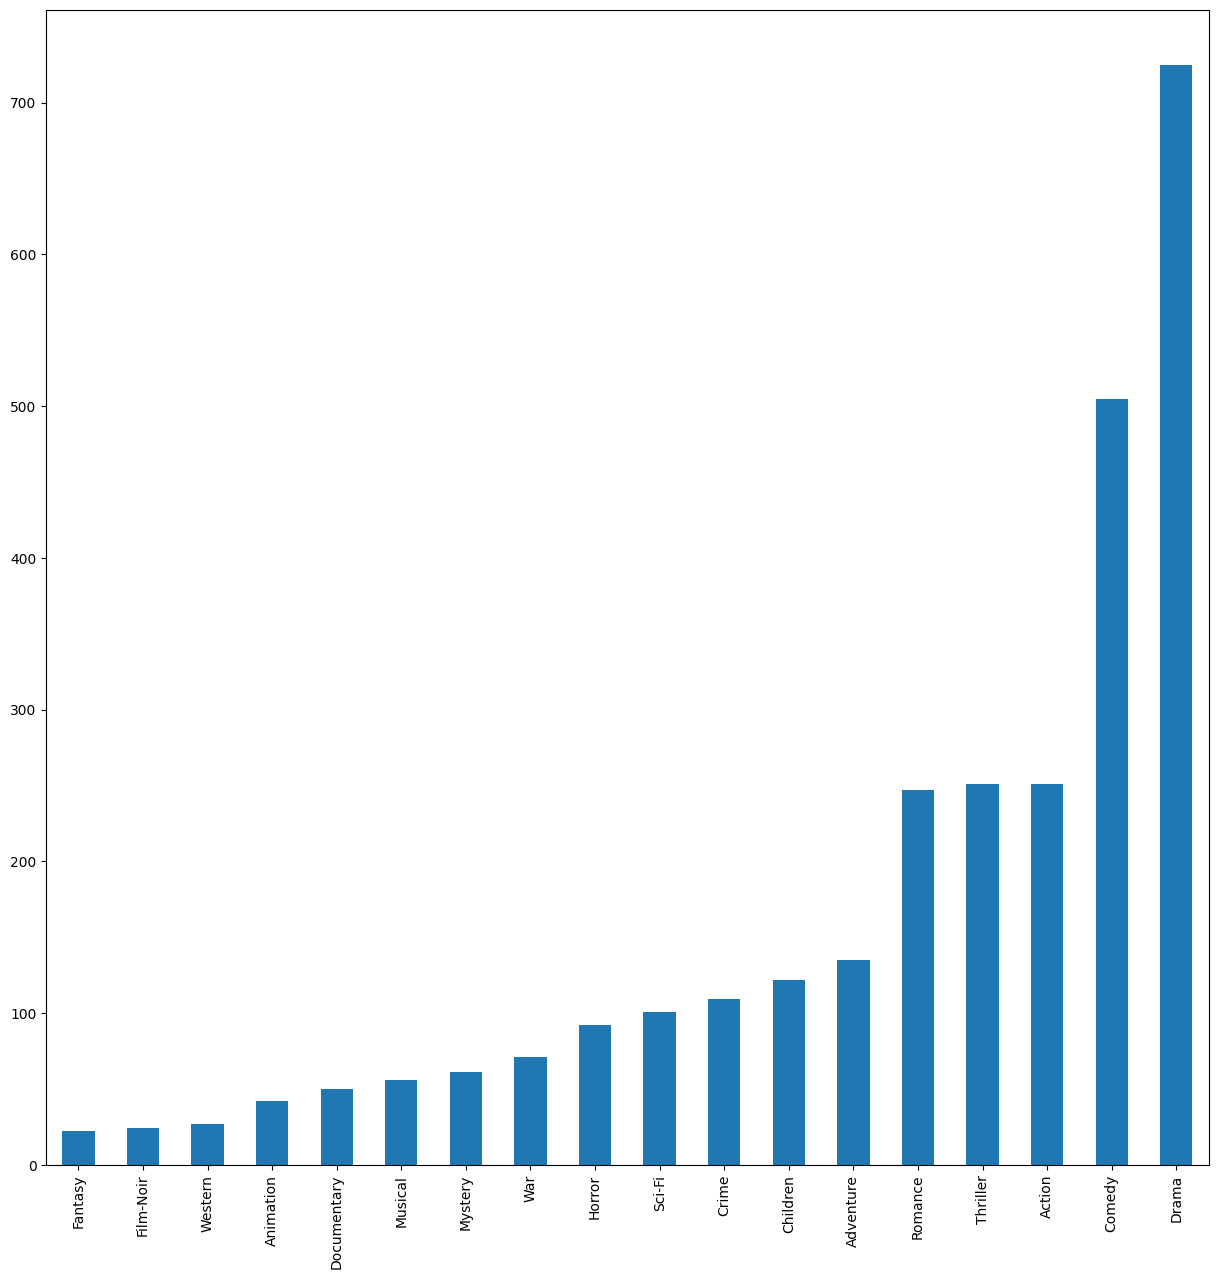

In [35]:
# Let's check the distribution of genres
df_item.iloc[:,6:].sum().sort_values().plot(kind='bar', figsize=(15,15))

In [39]:
# Let's check the distribution of release dates
df_item['release_date'].value_counts().sort_values(ascending=False).head(10)

release_date
01-Jan-1995    215
01-Jan-1994    213
01-Jan-1993    126
01-Jan-1997     98
01-Jan-1992     37
01-Jan-1996     26
01-Jan-1990     24
01-Jan-1991     22
01-Jan-1989     15
01-Jan-1986     14
Name: count, dtype: int64

<Axes: xlabel='rating'>

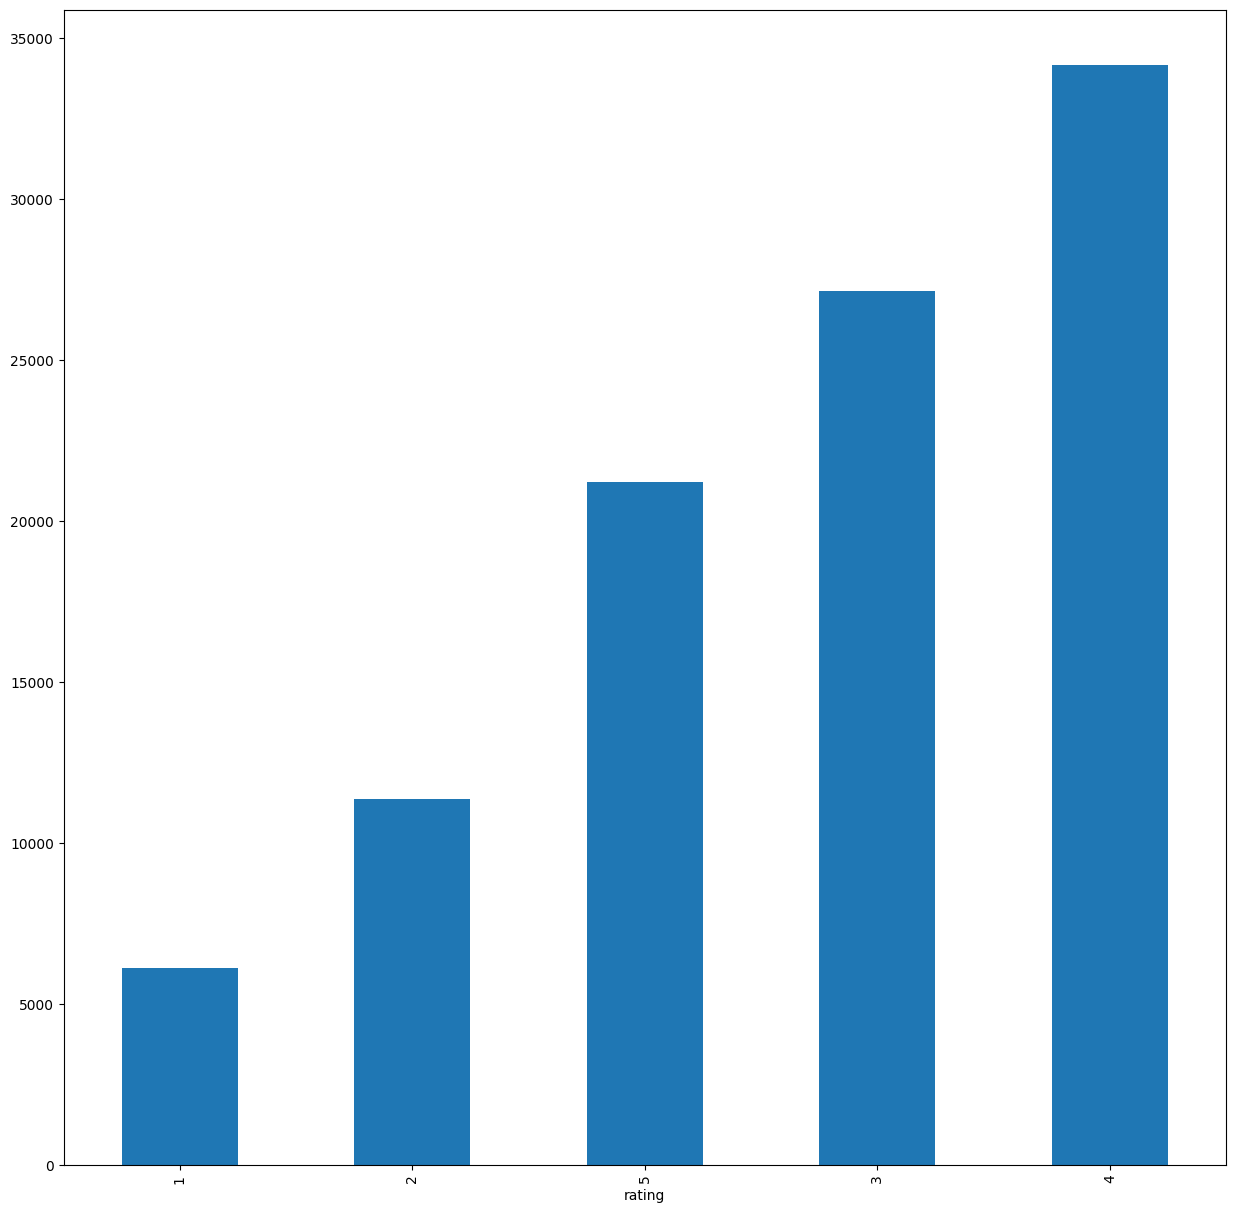

In [40]:
# Now, let's check the distribution of ratings
df['rating'].value_counts().sort_values().plot(kind='bar', figsize=(15,15))

# Conclusions about data
1. We have 943 users, and most of them are in the age group 20-30
2. We have 1682 movies, and most of them are Drama
3. Most of the movies are released in 1993-1995
4. Most of the ratings are 4, and also there is a bias toward higher ratings
5. We have 21 occupations, and most of the users are students